<a href="https://colab.research.google.com/github/nicholas-glanvill/wbs-pandas/blob/exploration/Selecting_and_indexing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the Pandas library

Don't forget to import each time you need to work with Pandas.

In [ ]:
import pandas as pd

## Index

Pandas index serves as the "row labels" for a DataFrame or Series. It supports various types for its elements (integers, strings, datetime objects etc.) and should provide a unique identifier for each row (although this is not enforced).

#### Default index

If no index is specified when creating a DataFrame, Pandas' default index will be assigned: a range of integers starting from 0 and incrementing by 1 for each row.

In [ ]:
df_default = pd.DataFrame({'Name': ['Alice', 'Bob', 'Claire'],
                           'Age': [25, 30, 22]})

df_default.index

RangeIndex(start=0, stop=3, step=1)

In [ ]:
df_default

,Name,Age
0,Alice,25
1,Bob,30
2,Claire,22


#### Custom index

To create a custom index, use the parameter `index` when creating a DataFrame.

In [ ]:
df_custom = pd.DataFrame({'Name': ['Alice', 'Bob', 'Claire'],
                          'Age': [25, 30, 22]},
                         index=['ID001', 'ID002', 'ID003'])

df_custom.index

Index(['ID001', 'ID002', 'ID003'], dtype='object')

In [ ]:
df_custom

,Name,Age
ID001,Alice,25
ID002,Bob,30
ID003,Claire,22


#### Setting an existing column as the index
An existing column can be reassigned and set it as an index with `.set_index()` method

In [ ]:
df_default

,Name,Age
0,Alice,25
1,Bob,30
2,Claire,22


In [ ]:
df_default = df_default.set_index('Name')

df_default

,Age
Name,
Alice,25
Bob,30
Claire,22


###### **Good to know**: Behaviour of methods that are meant for making changes to the DataFrame

Note how we wrote `df_default = ` before `.set_index()`. Let's examine the behaviour without it:

In [ ]:
# creating a test dataframe

df_test = pd.DataFrame({'Name': ['Alice', 'Bob', 'Claire'],
                           'Age': [25, 30, 22]})
df_test

,Name,Age
0,Alice,25
1,Bob,30
2,Claire,22


In [ ]:
# using .set_index() without reassigning the result

df_test.set_index('Name')

,Age
Name,
Alice,25
Bob,30
Claire,22


In [ ]:
df_test

,Name,Age
0,Alice,25
1,Bob,30
2,Claire,22


Despite your efforts, the original DataFrame remains unchanged. The method doesn't change the original but creates a *new copy* the DataFrame with changes made. That is why you need to assign this new, changed copy of the DataFrame to the old name by writing  
 `df_test = df_test.set_index('Name')`

Many methods that are made for making changes on DataFrames have the parameter `inplace`. This parameter, when set to `inplace=True` forces the method to make changes on the original DataFrame, which can make things slightly more convenient.  
While you might see this parameter set to True in many examples, we encourage you to avoid it for the following reasons:  
- It forces a method to return None, which encourages a dangerous stateful, side-effecty style of coding which is likely to cause bugs.
- It doesn’t behave like it’s widely expected to behave e.g. saving memory (and only very rarely offers any performance improvement at all).
- It removes the ability to use method chaining
- The parameter will likely eventually be deprecated (so you may as well get used to not using it already).

> If you wanted just to see the output of the method `.set_index()`, you wouldn't need to write `df_default =`, and the original DataFrame wouldn't be changed (just this one output). In this way we can experiment with a DataFrame without needing to undo unwanted changes.  
Since we *do* want the change to effect the original DataFrame, we have overwriten with `df_default =`.

#### Reset index

Sometimes, after performing specific actions, your DataFrame has been sliced, manipulated and stitched back together, and so has its index. `.reset_index()` will reset  the index to default, and (depending on parameters) set the old index as a regular column or just drop it.

In [ ]:
df_default

,Age
Name,
Alice,25
Bob,30
Claire,22


In [ ]:
df_default = df_default.reset_index()

df_default

,Name,Age
0,Alice,25
1,Bob,30
2,Claire,22


## .loc
is an attribute used for label-based indexing, allowing you to select data using row and column labels.

In [ ]:
data = {
    'Name': ['Alice', 'Bob', 'Claire', 'David', 'Emma'],
    'Age': [25, 30, 22, 28, 35],
    'Salary': [50000, 60000, 45000, 70000, 80000],
    'Contract': ['probation', 'unlimited', '6 months', '3 years', 'unlimited']
}
df = pd.DataFrame(data)
df

,Name,Age,Salary,Contract
0,Alice,25,50000,probation
1,Bob,30,60000,unlimited
2,Claire,22,45000,6 months
3,David,28,70000,3 years
4,Emma,35,80000,unlimited


#### Selecting rows with .loc

##### Selecting a single row

In [ ]:
df.loc[3]

Name          David
Age              28
Salary        70000
Contract    3 years
Name: 3, dtype: object

Compare this to the DataFrame as a whole and you'll see the Series above matches the row labeled `3`.



In [ ]:
df

,Name,Age,Salary,Contract
0,Alice,25,50000,probation
1,Bob,30,60000,unlimited
2,Claire,22,45000,6 months
3,David,28,70000,3 years
4,Emma,35,80000,unlimited


##### Selecting multiple rows

1. with a list of labels

In [ ]:
df.loc[[0,3]]

,Name,Age,Salary,Contract
0,Alice,25,50000,probation
3,David,28,70000,3 years


2. with a slice of labels

> **Note**: A brief review on slicing.
> For ordered collections (lists, tuples, even strings) it is possible to select a range of entries from the collection.
> ```
my_list = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']
my_list[2:6]
```
> This will return `['c', 'd', 'e', 'f']`. `'c'` is in index position 2, and `'f'` is in index position 5.
> Index position 6 — the right side of the slice — is _excluded_.

In [ ]:
df.loc[0:2]

,Name,Age,Salary,Contract
0,Alice,25,50000,probation
1,Bob,30,60000,unlimited
2,Claire,22,45000,6 months


Note that slicing with `.loc` is inclusive (both 0 on the left and 2 on the right are included in the result)

Leaving the left side or a slice blank means "from the start" to the given label (1).

In [ ]:
df.loc[:1]

,Name,Age,Salary,Contract
0,Alice,25,50000,probation
1,Bob,30,60000,unlimited


Likewise with leaving the right side of the slice blank: the slice runs from the left side (1) "to the end".

In [ ]:
df.loc[1:]

,Name,Age,Salary,Contract
1,Bob,30,60000,unlimited
2,Claire,22,45000,6 months
3,David,28,70000,3 years
4,Emma,35,80000,unlimited


By leaving both sides blank, all rows are included in the slice.  

In [ ]:
df.loc[:]

,Name,Age,Salary,Contract
0,Alice,25,50000,probation
1,Bob,30,60000,unlimited
2,Claire,22,45000,6 months
3,David,28,70000,3 years
4,Emma,35,80000,unlimited


Since index labels are not always numbers, here is an example with strings:

In [ ]:
data = {
    'Name': ['Alice', 'Bob', 'Claire', 'David', 'Emma'],
    'Age': [25, 30, 22, 28, 35],
    'Salary': [50000, 60000, 45000, 70000, 80000],
    'Contract': ['probation', 'unlimited', '6 months', '3 years', 'unlimited']
}
df = pd.DataFrame(data,index=['A','B','C','D','E'])
df

,Name,Age,Salary,Contract
A,Alice,25,50000,probation
B,Bob,30,60000,unlimited
C,Claire,22,45000,6 months
D,David,28,70000,3 years
E,Emma,35,80000,unlimited


In [ ]:
df.loc['A':'C']

,Name,Age,Salary,Contract
A,Alice,25,50000,probation
B,Bob,30,60000,unlimited
C,Claire,22,45000,6 months


#### Selecting columns with .loc

By giving `.loc[]` a second argument, you can select columns as well as rows.

In [ ]:
data = {
    'Name': ['Alice', 'Bob', 'Claire', 'David', 'Emma'],
    'Age': [25, 30, 22, 28, 35],
    'Salary': [50000, 60000, 45000, 70000, 80000],
    'Contract': ['probation', 'unlimited', '6 months', '3 years', 'unlimited']
}
df = pd.DataFrame(data)
df

,Name,Age,Salary,Contract
0,Alice,25,50000,probation
1,Bob,30,60000,unlimited
2,Claire,22,45000,6 months
3,David,28,70000,3 years
4,Emma,35,80000,unlimited


##### Selecting a single column

In [ ]:
df.loc[:,"Age"]

0    25
1    30
2    22
3    28
4    35
Name: Age, dtype: int64

Before the comma, the colon (:) represents all rows. After the  comma (,) "Age" represents the column label.

##### Selecting multiple columns

As with rows, multiple columns can be selected using either a list or a slice.

In [ ]:
df.loc[:,["Age","Salary"]]

,Age,Salary
0,25,50000
1,30,60000
2,22,45000
3,28,70000
4,35,80000


The columns in a DataFrame have an _order_, and we can see that order, among other ways, with `.columns` attribute.

In [ ]:
df.columns

Index(['Name', 'Age', 'Salary', 'Contract'], dtype='object')

Since they are ordered, we can select columns _from_ one position _to_ another.

In [ ]:
df.loc[:,"Age":"Contract"]

,Age,Salary,Contract
0,25,50000,probation
1,30,60000,unlimited
2,22,45000,6 months
3,28,70000,3 years
4,35,80000,unlimited


While all of the examples above have selected rows and columns in their orginal order, this need not be the case.     
`df.loc[:, ["Age", "Salary", "Name"]]` is perfectly legitimate to write and will return columns _in the order written_.

> **A sidebar on output format:** Selecting a single row or column returns a Series, but sometimes you may wish to see or work with a DataFrame. In this case, giving the single label *as a list* produces the desired result.

In [ ]:
df.loc[[0]]

,Name,Age,Salary,Contract
0,Alice,25,50000,probation


In [ ]:
df.loc[:,["Age"]]

,Age
0,25
1,30
2,22
3,28
4,35


## .iloc
is an attribute used for postion-based indexing, allowing you to select data using row and column positions.
`df.iloc[rows_pos,columns_pos]`

In [ ]:
df.iloc[:2,:1]

,Name
0,Alice
1,Bob


In this case, it seems like .loc and .iloc function the same, especially in the case of rows, but that is just a coincidence because the default index is a range of integers starting from 0 and increasing by 1, making it the same as the position of the row.  
Look at the next image to see the difference of selecting with `.loc` and `.iloc`
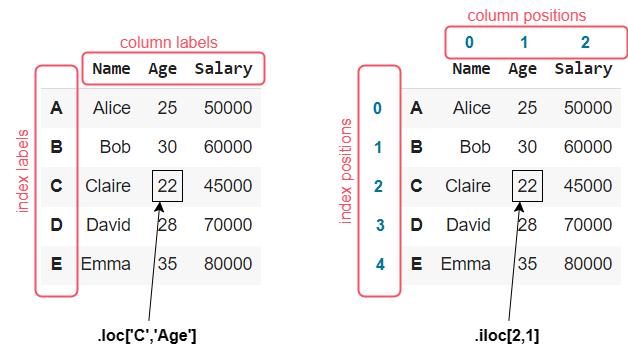

The second thing to note is that while slicing with `.loc` is inclusive, slicing with `.iloc` is *exclusive* on the *right side*. `.iloc[:2, :]` returns only the rows in positions 0 and 1.

## Indexing operator [&nbsp;]

The indexing operator `[ ]` is used to select one or more columns.

In [ ]:
df['Age']

0    25
1    30
2    22
3    28
4    35
Name: Age, dtype: int64

Multiple columns are selected as a list within the indexing operator.

In [ ]:
df[['Age', 'Salary']]

,Age,Salary
0,25,50000
1,30,60000
2,22,45000
3,28,70000
4,35,80000


`.column_name` also returns one column as a Series. Most of the time we will use `[ ]` for readability.

In [ ]:
df.Age

0    25
1    30
2    22
3    28
4    35
Name: Age, dtype: int64

> **Note:** This syntax will not work if the column name contains whitespace or characters special to Python.

## Challenges

In [ ]:
data = {
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'San Francisco'],
    'Population': [8622698, 3990456, 2716000, 2312717, 870887],
    'Area_sq_miles': [302.6, 468.7, 227.3, 627.8, 46.9],
    'Country': ['USA', 'USA', 'USA', 'USA', 'USA'],
    'Year_Founded': [1624, 1781, 1833, 1836, 1776]
}
cities_df = pd.DataFrame(data)
cities_df

,City,Population,Area_sq_miles,Country,Year_Founded
0,New York,8622698,302.6,USA,1624
1,Los Angeles,3990456,468.7,USA,1781
2,Chicago,2716000,227.3,USA,1833
3,Houston,2312717,627.8,USA,1836
4,San Francisco,870887,46.9,USA,1776


**Make sure to save all the changes in the challenges to the original dataframe `cities_df`**

### Challenge 1
 Set the 'City' column as the index


In [ ]:
# Your code here

### Challenge 2
Restore the default index (Keep 'City' as a column)


In [ ]:
# Your code here

### Challenge 3
Using `.iloc`, select the last 2 rows


In [ ]:
# Your code here

### Challenge 4
Using `.loc`, select all the rows but only the columns 'Population' and 'City'


In [ ]:
# Your code here

### Challenge 5
 using `.loc`, select the columns 'Area_sq_miles' and 'Country' for the city 'Houston'


In [ ]:
# Your code here

### Challenge 6
 using `.iloc`, select the first 3 rows and the columns 'City' and 'Year_Founded'  


In [ ]:
# Your code here